# Regression Assignment
In this problem we use the abalone dataset available on Canvas.
The dataset is about predicting the age of the abalone from its
physical measurements. Use the first 7 variables as predictors
and the 8-th as the response. Report all results as the average
of 10 random splits with 80% of data for training and 20% for testing.

#### Import dependencies

In [16]:
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

#### Load data

In [17]:
abalone_dataset = np.loadtxt("data/abalone.csv", delimiter=",")

#### Utility functions

In [18]:
def get_data():
    """ Get randomly split training and test data

    :returns training_x, training_y, test_x, test_y
    :rtype tuple(ndarray, ndarray, ndarray, ndarray)
    """
    # split data into x and y
    x, y = np.hsplit(abalone_dataset, [7])
    # randomly split the data into training and testing
    training_x, test_x, training_y, test_y = train_test_split(x, y, train_size=.8)

    return training_x, training_y, test_x, test_y

def average_ten_runs(func):
    """This decorator augments your function to run ten times
    and return the average result(s)

    Example usage
    The following function returns the average of ten random numbers:
    @average_ten_runs
    def random_number():
        return random.random()

    :parameter func your function
    :returns modified version of your function that returns the mean of ten runs
    """
    def wrapper(*args):
        # Runs func 10 times, putting each returned value into a separate list
        results = zip(*[func(*args) for __ in range(10)])
        # finds the average of each list
        averaged_results = tuple(sum(value_list)/10 for value_list in results)
        return averaged_results
    return wrapper


## OLS Regression
OLS regression, analytic, by solving the normal equations, with λ = 0.0001.
Report the average training and test R2 (2 points)

In [19]:
@average_ten_runs
def OLS_regression():
    """Solves OLS regression model analytically

    :returns training_R2, testing_R2 r-squared of the model predictions
                                     on the training and testing data
    """
    # get data
    training_x, training_y, test_x, test_y = get_data()
    # add columns of 1s
    training_x = np.hstack((np.ones([np.size(training_x, axis=0), 1]), training_x))
    test_x = np.hstack((np.ones([np.size(test_x, axis=0), 1]), test_x))

    # Solve OLS regression model analytically using the normal equation from the lecture
    X = training_x
    Y = training_y
    lmb = 0.0001
    parameters = inv(X.T.dot(X) + lmb * np.eye(np.size(X, axis=1))).dot(X.T).dot(Y)

    # predict y values
    predicted_training_y = training_x.dot(parameters)
    predicted_test_y = test_x.dot(parameters)

    # calculate r-squared
    training_R2 = r2_score(training_y, predicted_training_y)
    testing_R2 = r2_score(test_y, predicted_test_y)

    return training_R2, testing_R2

print("Average R2 on training data: {:.4f}\n" \
      "Average R2 on testing data: {:.4f}".format(*OLS_regression()))

Average R2 on training data: 0.5262
Average R2 on testing data: 0.5219


## Regression Tree
Regression trees with max depth 7 giving the r2 score for both trainign and test
then plotted with R^2 vs tree depth(2 points).

In [20]:
@average_ten_runs
def Reg_Tree(x):

    training_x, training_y, test_x, test_y = get_data()

    tree=DecisionTreeRegressor(max_depth=x)
    tree.fit(training_x, training_y)
    predicted_training_y=tree.predict(training_x)
    predicted_test_y =tree.predict(test_x)
    r2_tree_test=r2_score(predicted_test_y, test_y)
    r2_tree_training=r2_score(training_y, predicted_training_y)

    return r2_tree_test, r2_tree_training

r2_test=[]
r2_training=[]
depth_trees=[]

for x in range(1,8):
    test , train = Reg_Tree(x)
    depth_trees.append(x)
    r2_test.append(test)
    r2_training.append(train)

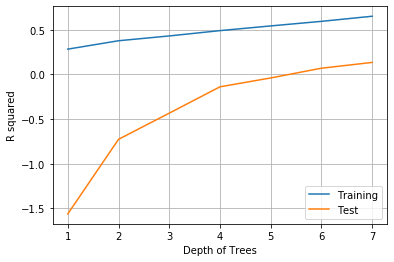

In [21]:
def R2_vs_depth_plot():
    x1=depth_trees
    x2=depth_trees
    y1 = r2_training
    y2 = r2_test
    plt.xlabel("Depth of Trees")
    plt.ylabel("R squared")
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.legend(["Training", "Test"], loc="lower right")



    plt.grid(True, which='both')
    plt.show()


R2_vs_depth_plot()

## Random Forest Regression
Random forest regression with 10, 30 and 100 trees. Report the average training and test R2 in each case. (3 points)

Average results over ten runs:


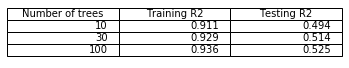

In [22]:
@average_ten_runs
def random_forest_regression(num_trees_in_forest):
    # get data
    training_x, training_y, test_x, test_y = get_data()

    # train forest
    forest = RandomForestRegressor(n_estimators=num_trees_in_forest)
    forest.fit(training_x, np.ravel(training_y))

    # predict y values
    predicted_training_y = forest.predict(training_x)
    predicted_test_y = forest.predict(test_x)

    # calculate r-squared
    r2_training = r2_score(training_y, predicted_training_y)
    r2_test = r2_score(test_y, predicted_test_y)

    return r2_training, r2_test

# get R2 for 10, 30, and 100 trees, arranging them into a 2D list for the table
num_trees = [10, 30, 100]
results = [[n, *map(lambda x: f"{x:.3f}", random_forest_regression(n))] for n in num_trees]

# display table
print("Average results over ten runs:")
plt.figure(figsize=(6, 1)) # set figure size
plt.axis("off")            # turn off plot
plt.table(cellText=results, colLabels=["Number of trees", "Training R2", "Testing R2"], loc="upper center")
plt.show()